**Phases of this project**:

*   Prepare Elonmusk dataset 
*   Resizing images
*   Convert images to RGB
*   Get the numpyarray of RGB images






#1.Install libraries

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 18 kB/s 
     |████████████████████████████████| 1.4 MB 7.0 MB/s 
     |████████████████████████████████| 5.8 MB 43.5 MB/s 
     |████████████████████████████████| 462 kB 56.8 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.2
    Uninstalling tensorflow-2.9.2:
      Successfully uninstalled tensorflow-2.9.2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvid

In [ ]:
!pip install git+https://github.com/Joeclinton1/google-images-download.git    #install if you want to use google_images_download
!git clone https://github.com/Joeclinton1/google-images-download.git
!cd google-images-download && sudo python setup.py install

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Joeclinton1/google-images-download.git to /tmp/pip-req-build-uj4l9qhf
  Running command git clone -q https://github.com/Joeclinton1/google-images-download.git /tmp/pip-req-build-uj4l9qhf
     |████████████████████████████████| 5.2 MB 7.5 MB/s 
     |████████████████████████████████| 384 kB 50.4 MB/s 
     |████████████████████████████████| 140 kB 44.5 MB/s 
     |████████████████████████████████| 58 kB 5.1 MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=16299 sha256=42d19cb1df653bf75f4b0ba83cacb4fdda433e25510ab9614a1cd7b8f53e22fc
  Stored in directory: /tmp/pip-ephem-wheel-cache-09qvojms/wheels/79/5c/d2/2569a4f55ff29b3c4d6b1114d5110a70a79afbf381e6eb3e87
Successfully built google-images-download
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urlli

In [ ]:
!pip install bing-image-downloader #in this project we use that

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#2.Import libraries

##GPU

#Don't run this cell 

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

##tensorflow libraries

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15275485924982892009
 xla_global_id: -1]

##connect to googledrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Elon/

/content/drive/MyDrive/Elon


In [ ]:
ls

cropped-image-opencv.jpg  Elon1/                   Image_22.jpg
dataset/                  google-images-download/  resizeimg22.jpg
Elon/                     Image_1.jpg              resizeimg.jpg


##necessary libraries in this project

In [ ]:
#from bing_image_downloader import downloader
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

#3.Download Elon mask dataset

In [ ]:
downloader.download("Elon Musk", limit=100,  output_dir='Elon1', 
                    adult_filter_off=True, force_replace=False, timeout=60)

##Read image and get shape of that





[[[221 207 211]
  [222 208 212]
  [219 208 211]
  ...
  [118  50  27]
  [118  51  26]
  [118  51  24]]

 [[222 208 212]
  [222 208 212]
  [219 208 211]
  ...
  [119  52  27]
  [119  51  28]
  [120  51  31]]

 [[218 207 210]
  [217 206 209]
  [218 207 210]
  ...
  [117  51  26]
  [119  51  28]
  [117  47  30]]

 ...

 [[ 69  33  25]
  [ 69  33  25]
  [ 70  33  25]
  ...
  [ 45   9   1]
  [ 47  11   5]
  [ 45   8   4]]

 [[ 68  32  24]
  [ 69  32  24]
  [ 69  32  24]
  ...
  [ 42   8   2]
  [ 42   8   2]
  [ 45   9   3]]

 [[ 67  31  23]
  [ 69  32  24]
  [ 69  32  24]
  ...
  [ 45   9   1]
  [ 46   9   5]
  [ 42   7   4]]]


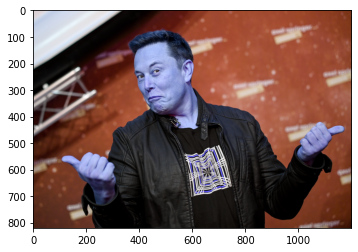

pixels [[[221 207 211]
  [222 208 212]
  [219 208 211]
  ...
  [118  50  27]
  [118  51  26]
  [118  51  24]]

 [[222 208 212]
  [222 208 212]
  [219 208 211]
  ...
  [119  52  27]
  [119  51  28]
  [120  51  31]]

 [[218 207 210]
  [217 206 209]
  [218 207 210]
  ...
  [117  51  26]
  [119  51  28]
  [117  47  30]]

 ...

 [[ 69  33  25]
  [ 69  33  25]
  [ 70  33  25]
  ...
  [ 45   9   1]
  [ 47  11   5]
  [ 45   8   4]]

 [[ 68  32  24]
  [ 69  32  24]
  [ 69  32  24]
  ...
  [ 42   8   2]
  [ 42   8   2]
  [ 45   9   3]]

 [[ 67  31  23]
  [ 69  32  24]
  [ 69  32  24]
  ...
  [ 45   9   1]
  [ 46   9   5]
  [ 42   7   4]]]


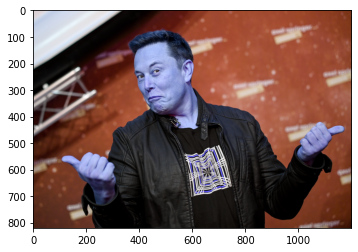

In [10]:
img = cv2.imread("Image_1.jpg")
print(img)
plt.imshow(img)
plt.show()
pixels = np.array(img)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()

[[[221 207 211]
  [222 208 212]
  [219 208 211]
  ...
  [118  50  27]
  [118  51  26]
  [118  51  24]]

 [[222 208 212]
  [222 208 212]
  [219 208 211]
  ...
  [119  52  27]
  [119  51  28]
  [120  51  31]]

 [[218 207 210]
  [217 206 209]
  [218 207 210]
  ...
  [117  51  26]
  [119  51  28]
  [117  47  30]]

 ...

 [[ 69  33  25]
  [ 69  33  25]
  [ 70  33  25]
  ...
  [ 45   9   1]
  [ 47  11   5]
  [ 45   8   4]]

 [[ 68  32  24]
  [ 69  32  24]
  [ 69  32  24]
  ...
  [ 42   8   2]
  [ 42   8   2]
  [ 45   9   3]]

 [[ 67  31  23]
  [ 69  32  24]
  [ 69  32  24]
  ...
  [ 45   9   1]
  [ 46   9   5]
  [ 42   7   4]]]
Image Width is 1200
Image Height is 820
pixels [[[211 207 221]
  [212 208 222]
  [211 208 219]
  ...
  [ 27  50 118]
  [ 26  51 118]
  [ 24  51 118]]

 [[212 208 222]
  [212 208 222]
  [211 208 219]
  ...
  [ 27  52 119]
  [ 28  51 119]
  [ 31  51 120]]

 [[210 207 218]
  [209 206 217]
  [210 207 218]
  ...
  [ 26  51 117]
  [ 28  51 119]
  [ 30  47 117]]

 ...

 [[ 2

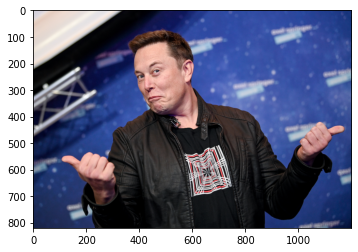

In [11]:
img = cv2.imread("Image_1.jpg")
print(img)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print('Image Width is',img.shape[1])
print('Image Height is',img.shape[0])
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()

#4.Resizing images 
##4.1 Resizing using OpenCV

Image Width is 250
Image Height is 250
pixels [[[211 208 219]
  [211 207 220]
  [212 209 220]
  ...
  [ 21  51 119]
  [ 25  50 117]
  [ 27  52 119]]

 [[211 208 219]
  [211 208 219]
  [212 209 220]
  ...
  [ 20  52 121]
  [ 23  51 119]
  [ 31  51 121]]

 [[211 208 217]
  [211 208 218]
  [213 210 220]
  ...
  [ 27  52 125]
  [ 25  52 123]
  [ 30  53 124]]

 ...

 [[ 26  34  74]
  [ 25  35  74]
  [ 23  36  73]
  ...
  [  8  18  61]
  [  3  16  55]
  [  3  11  48]]

 [[ 25  34  70]
  [ 26  35  74]
  [ 23  35  73]
  ...
  [  6  18  57]
  [  2  15  52]
  [  1  10  47]]

 [[ 24  32  69]
  [ 22  34  72]
  [ 22  34  73]
  ...
  [  3  18  56]
  [  1  13  51]
  [  2   8  42]]]


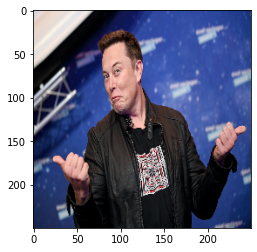

In [12]:
resized_img = cv2.resize(img, (250,250))       # resize image by specifying custom width and height
print('Image Width is',resized_img.shape[1])
print('Image Height is',resized_img.shape[0])
image = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()

##4.2 Crop images using OpenCV

Cropped Image Dimensions : (250, 250, 3)
pixels [[[  7  11  46]
  [  8  12  50]
  [ 10  10  46]
  ...
  [ 51  75 163]
  [ 51  75 163]
  [ 53  74 163]]

 [[  8  12  49]
  [  7  13  45]
  [  9  11  52]
  ...
  [ 50  74 162]
  [ 52  76 164]
  [ 53  73 162]]

 [[  7  11  48]
  [  6  10  48]
  [  4  12  49]
  ...
  [ 51  75 163]
  [ 51  72 161]
  [ 51  71 160]]

 ...

 [[ 45  71 155]
  [ 47  72 154]
  [ 47  72 152]
  ...
  [156  96  85]
  [148  89  73]
  [147  88  72]]

 [[ 50  73 153]
  [ 48  73 157]
  [ 47  74 153]
  ...
  [152  96  81]
  [147  90  73]
  [147  86  68]]

 [[ 46  71 155]
  [ 47  72 154]
  [ 45  72 151]
  ...
  [159 101  87]
  [151  92  76]
  [149  90  74]]]


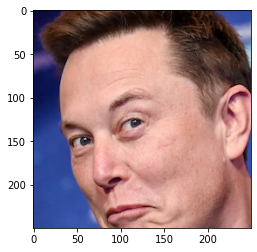

In [13]:
cropped_image = img[100:350, 350:600]     # image[startY:endY, startX:endX]
cv2.imwrite('cropped-image-opencv.jpg', cropped_image)
print(f"Cropped Image Dimensions : {cropped_image.shape}") # 2732x3640
image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()

#5.convert images to RGB

In [14]:
image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

#6.Get numpy array of RGB image and show image

pixels [[[  7  11  46]
  [  8  12  50]
  [ 10  10  46]
  ...
  [ 51  75 163]
  [ 51  75 163]
  [ 53  74 163]]

 [[  8  12  49]
  [  7  13  45]
  [  9  11  52]
  ...
  [ 50  74 162]
  [ 52  76 164]
  [ 53  73 162]]

 [[  7  11  48]
  [  6  10  48]
  [  4  12  49]
  ...
  [ 51  75 163]
  [ 51  72 161]
  [ 51  71 160]]

 ...

 [[ 45  71 155]
  [ 47  72 154]
  [ 47  72 152]
  ...
  [156  96  85]
  [148  89  73]
  [147  88  72]]

 [[ 50  73 153]
  [ 48  73 157]
  [ 47  74 153]
  ...
  [152  96  81]
  [147  90  73]
  [147  86  68]]

 [[ 46  71 155]
  [ 47  72 154]
  [ 45  72 151]
  ...
  [159 101  87]
  [151  92  76]
  [149  90  74]]]


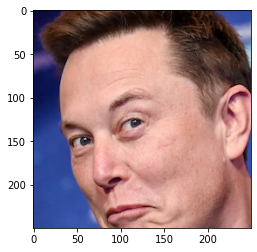

In [15]:
pixels = np.array(image)
print('pixels', pixels)
plt.imshow(pixels)
plt.show()
#plt.imsave('resizeimg22.jpg', pixels)